# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [0]:
import pandas as pd
import numpy as np
import folium


In [3]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/JonasZimmer1994/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: True
Cloning into 'DataScienceSS20'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 767 (delta 3), reused 0 (delta 0), pack-reused 759
Receiving objects: 100% (767/767), 111.67 MiB | 21.41 MiB/s, done.
Resolving deltas: 100% (371/371), done.
Checking out files: 100% (204/204), done.


In [0]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv(path+'/DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [5]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,is_pickup_JFK,is_dropoff_JFK,is_pickup_EWR,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia,trip_distance,is_pickup_lower_manhattan,is_dropoff_lower_manhattan,pickup_borough_bronx,pickup_borough_brooklyn,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0,0,0,0,0,0,0.640487,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,0,0,0,0,0,0,5.250670,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,0,0,0,0,0,0,0.863411,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,0,0,0,0,0,0,1.739386,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,0,0,0,0,0,0,1.242218,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [6]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-2014 for training and 2015 for evaluation


In [7]:
Years = X.groupby(X['pickup_year'])
Years.get_group(2009)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,is_pickup_JFK,is_dropoff_JFK,is_pickup_EWR,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia,trip_distance,is_pickup_lower_manhattan,is_dropoff_lower_manhattan,pickup_borough_bronx,pickup_borough_brooklyn,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0,0,0,0,0,0,0.640487,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9,-73.980658,40.733873,-73.991540,40.758138,2,2,1,3,9,2009,0,0,0,0,0,0,1.770676,1,0,0,0,1,0,0,0,0,0,1,0,0,0
11,-73.991601,40.744712,-73.983081,40.744682,2,6,1,5,11,2009,0,0,0,0,0,0,0.446000,0,0,0,0,1,0,0,0,0,0,1,0,0,0
15,-73.981060,40.737690,-73.994177,40.728412,1,22,16,3,7,2009,0,0,0,0,0,0,0.939454,1,1,0,0,1,0,0,0,0,0,1,0,0,0
20,-73.991707,40.770505,-73.985459,40.763671,1,6,18,4,8,2009,0,0,0,0,0,0,0.574331,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399963,-73.992709,40.740467,-73.972586,40.754990,1,19,1,4,2,2009,0,0,0,0,0,0,1.454784,1,0,0,0,1,0,0,0,0,0,1,0,0,0
399986,-74.008813,40.713915,-73.979168,40.757925,1,12,9,2,5,2009,0,0,0,0,0,0,3.413977,1,0,0,0,1,0,0,0,0,0,1,0,0,0
399989,-73.983200,40.722297,-73.982277,40.735242,1,17,22,2,3,2009,0,0,0,0,0,0,0.895718,1,1,0,0,1,0,0,0,0,0,1,0,0,0
399994,-73.951399,40.770201,-73.973983,40.763075,1,2,11,4,7,2009,0,0,0,0,0,0,1.280272,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [0]:
#X_test = Years.get_group(2015)
#X_train = X.drop(Years.get_group(2015).index)
X_train=X[X['pickup_year']<2015]
y_train=y[X['pickup_year']<2015]
X_test=X[X['pickup_year']==2015]
y_test=y[X['pickup_year']==2015]

In [0]:
#y_grouped = y.groupby(X['pickup_year'])
#y_test = y_grouped.get_group(2015)
#y_train = y.drop(y_grouped.get_group(2015).index)

In [0]:
#print(X_train.shape())

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [0]:
X_train, y_train = make_regression(n_features=31, n_informative=2, random_state=0, shuffle=False)

In [0]:
regr = RandomForestRegressor(n_jobs=5, n_estimators=20)

In [68]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=5, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
from sklearn.metrics import mean_squared_error
pred = regr.predict(X_test)
mean_squared_error(y_test, pred)

13666.271894362579

In [0]:
dif = np.abs(y_test - pred)

(array([4.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 4.000e+00, 6.000e+00,
        5.000e+00, 7.000e+00, 1.000e+01, 5.000e+00, 4.000e+00, 8.000e+00,
        6.000e+00, 7.000e+00, 8.000e+00, 1.000e+01, 3.930e+02, 4.300e+01,
        1.500e+02, 9.000e+01, 1.130e+02, 1.820e+02, 2.540e+02, 3.420e+02,
        3.670e+02, 3.580e+02, 5.910e+02, 8.630e+02, 1.645e+03, 2.323e+03,
        3.933e+03, 7.013e+03, 6.993e+03, 2.121e+03, 1.200e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

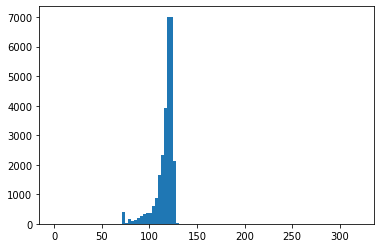

In [74]:
import matplotlib.pyplot as plt
plt.hist(dif, bins=100)

In [0]:
dif_kleiner = dif[dif<150]

(array([3.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 5.000e+00, 2.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 4.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 6.000e+00,
        6.800e+01, 3.210e+02, 9.000e+00, 1.800e+01, 2.000e+01, 1.080e+02,
        1.700e+01, 4.400e+01, 3.000e+01, 4.100e+01, 4.300e+01, 4.600e+01,
        6.200e+01, 7.600e+01, 7.500e+01, 1.140e+02, 9.200e+01, 1.240e+02,
        1.500e+02, 1.210e+02, 1.460e+02, 1.560e+02, 1.510e+02, 1.710e+02,
        1.530e+02, 2.360e+02, 1.910e+0

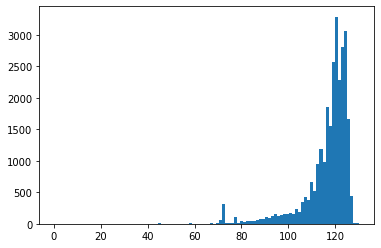

In [85]:
plt.hist(dif_kleiner, bins=100)

In [86]:
np.median(dif)

119.61935667774156